In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import PillowWriter
from matplotlib.animation import FuncAnimation, PillowWriter

In [24]:
world_artists = pd.read_csv("../data/top-world-artists.csv")
vn_artists = pd.read_csv("../data/top-vn-artists.csv")

In [25]:
daily_world_tracks = pd.read_csv("../data/top-daily-world-track-generalized.csv")
daily_vn_tracks = pd.read_csv("../data/top-daily-vn-track-generalized.csv")

In [26]:
train_data = pd.read_csv("../data/train_data_with_genre.csv")

In [27]:
train_data.head()

,track_id,track_name,artist_id,artist_name,popularity,album_name,genre,artist_genres,duration_ms,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,100,Die With A Smile,pop,"art pop,dance pop,pop",251667,False,...,-7.777,0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,https://api.spotify.com/v1/audio-analysis/2plb...,3
1,5R8dQOPq8haW94K7mgERlO,Poker Face,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,76,The Fame,pop,"art pop,dance pop,pop",237200,False,...,-4.618,1,0.0787,0.11900,0.000002,0.1210,0.774,119.001,https://api.spotify.com/v1/audio-analysis/5R8d...,4
2,0SiywuOBRcynK0uKGWdCnn,Bad Romance,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,82,The Fame Monster (Deluxe Edition),pop,"art pop,dance pop,pop",294573,True,...,-3.752,1,0.0363,0.00314,0.000053,0.0842,0.714,119.007,https://api.spotify.com/v1/audio-analysis/0Siy...,4
3,2x7MyWybabEz6Y6wvHuwGE,Just Dance,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,74,The Fame,pop,"art pop,dance pop,pop",241933,False,...,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.990,https://api.spotify.com/v1/audio-analysis/2x7M...,4
4,11BKm0j4eYoCPPpCONAVwA,Bloody Mary,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,73,Born This Way (Special Edition),pop,"art pop,dance pop,pop",244760,False,...,-6.365,0,0.0291,0.01070,0.000002,0.1130,0.440,99.998,https://api.spotify.com/v1/audio-analysis/11BK...,4


---
# Điểm popularity của mỗi thể loại nhìn chung

In [28]:
genres_overall_popularity = train_data.groupby("genre")["popularity"].mean().sort_values(ascending=False)

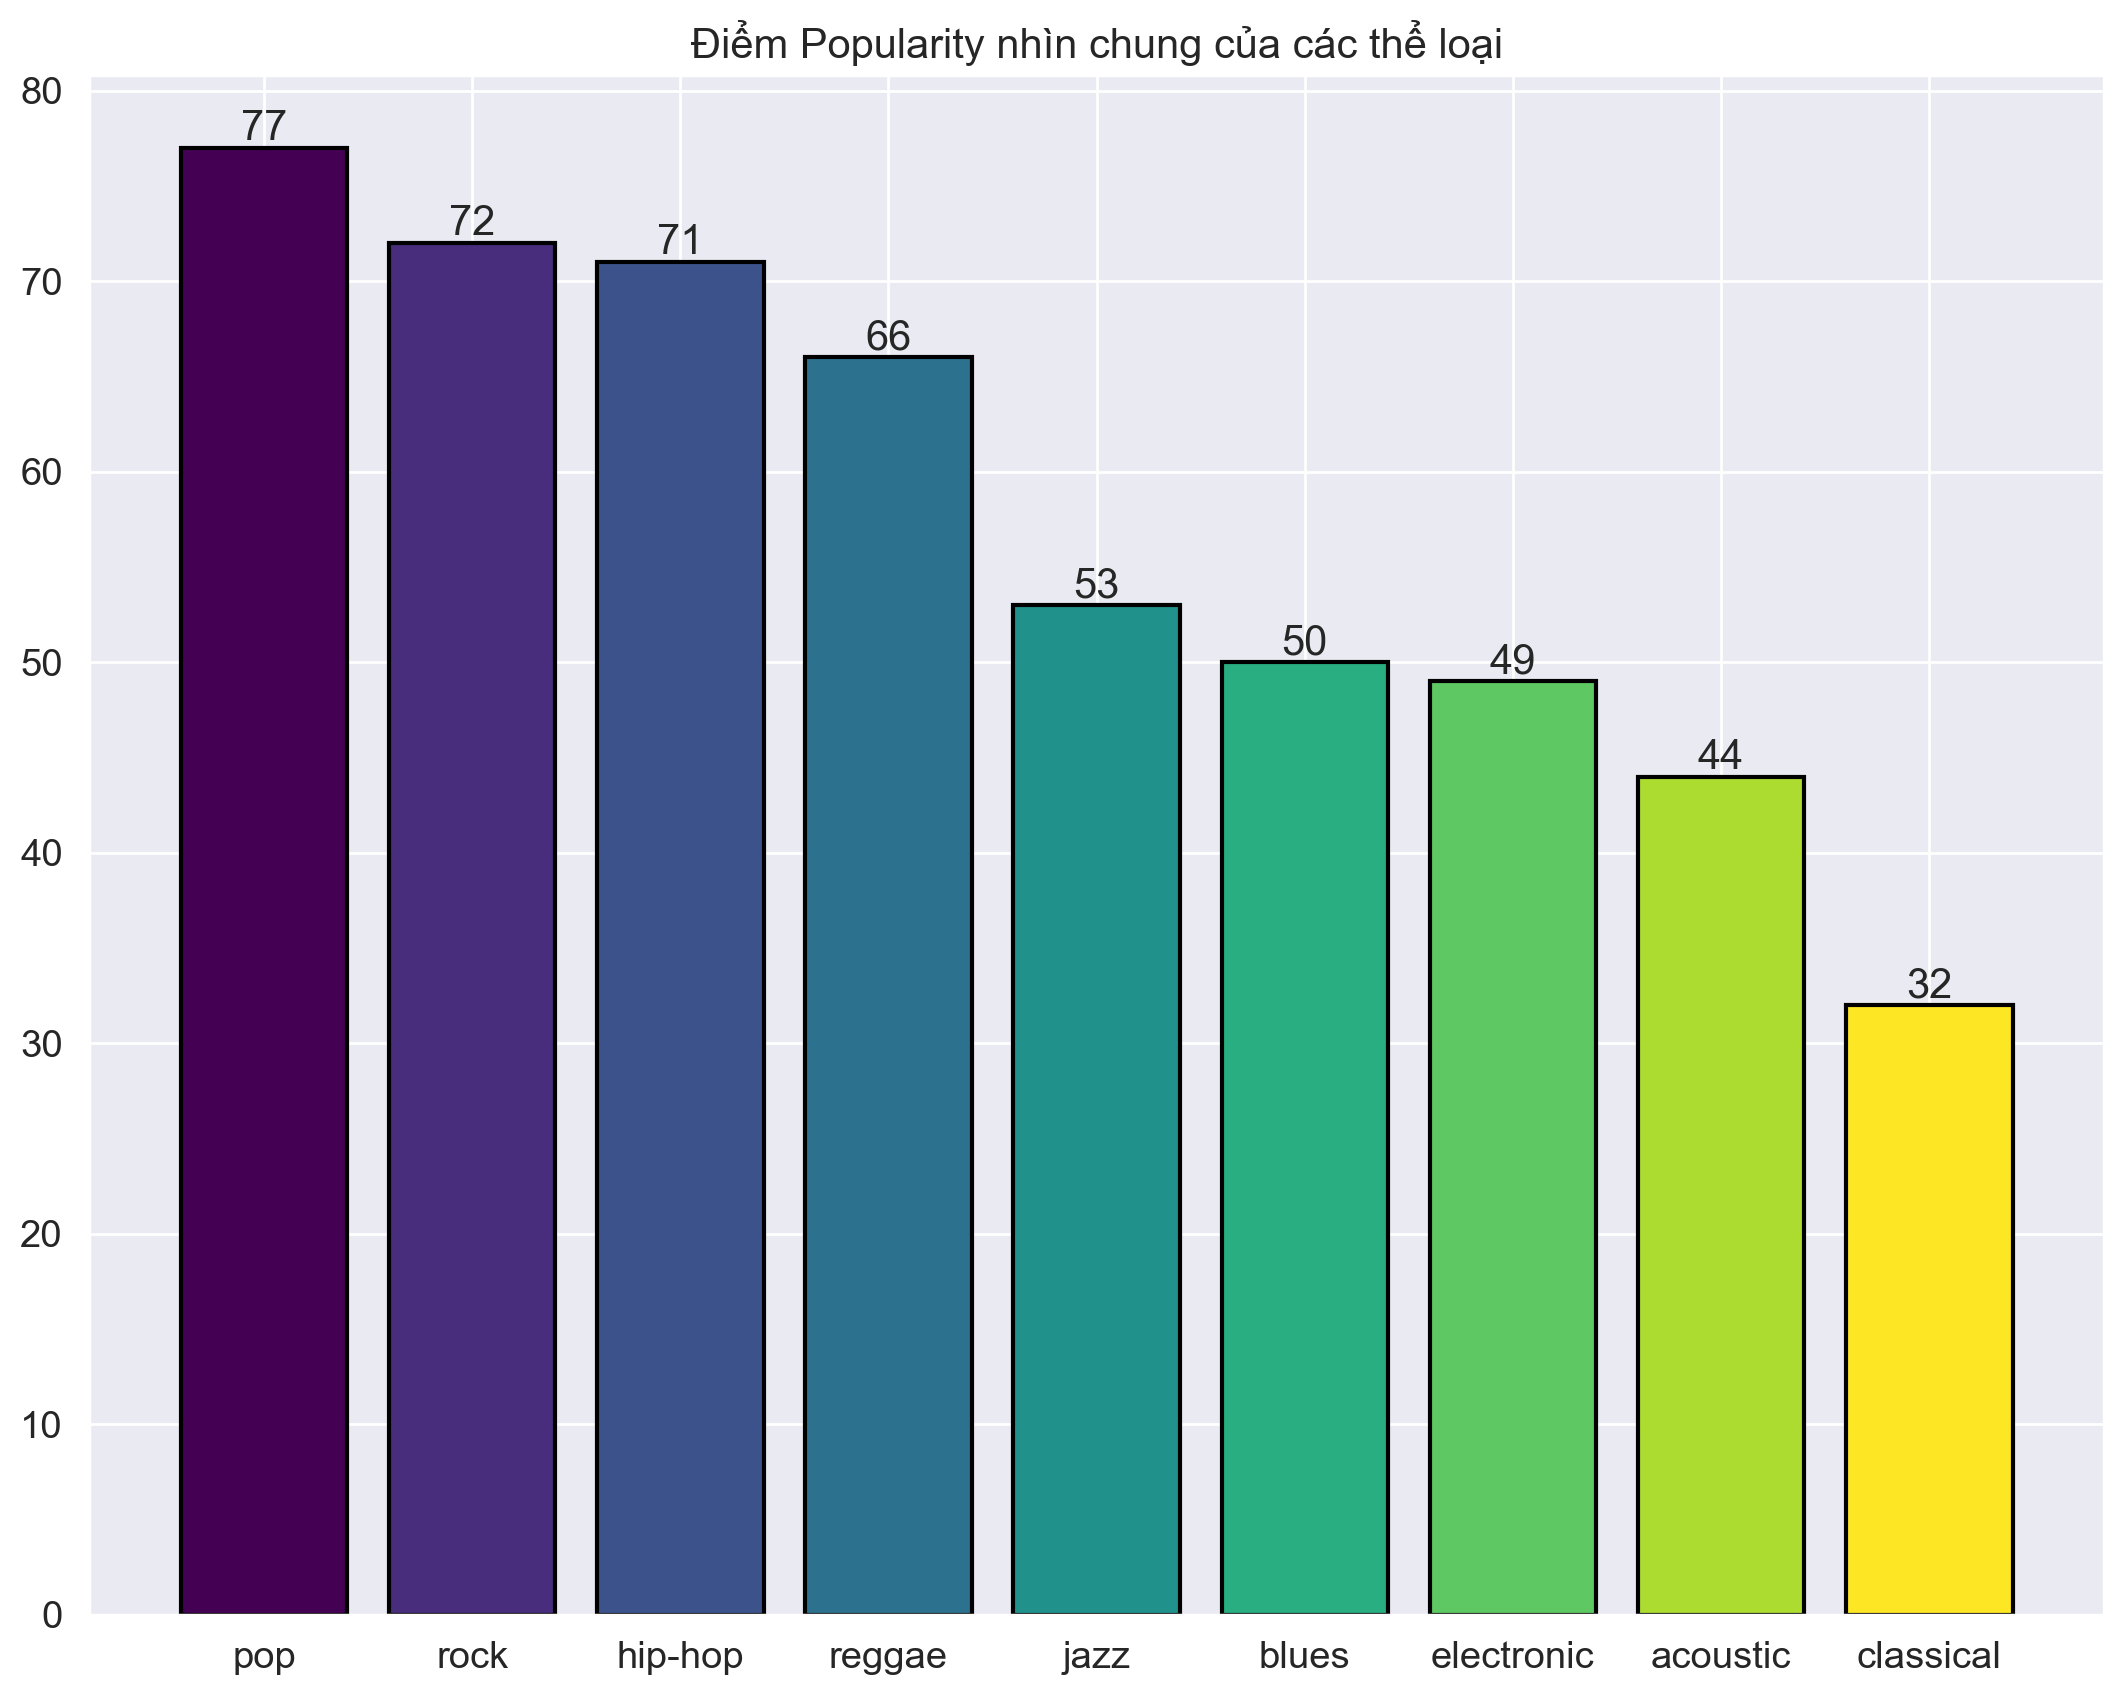

In [29]:
plt.figure(figsize=(13,10))
# plt.grid()
bar1 = plt.bar(genres_overall_popularity.index, genres_overall_popularity.astype(int), edgecolor="black", linewidth=1.5, color=plt.cm.viridis(np.linspace(0, 1, len(genres_overall_popularity))))
plt.bar_label(bar1)
plt.title("Điểm Popularity nhìn chung của các thể loại")
plt.show()

--- 
# Các thể loại chứa từ ngữ nhạy cảm

Text(0, 0.5, 'Count')

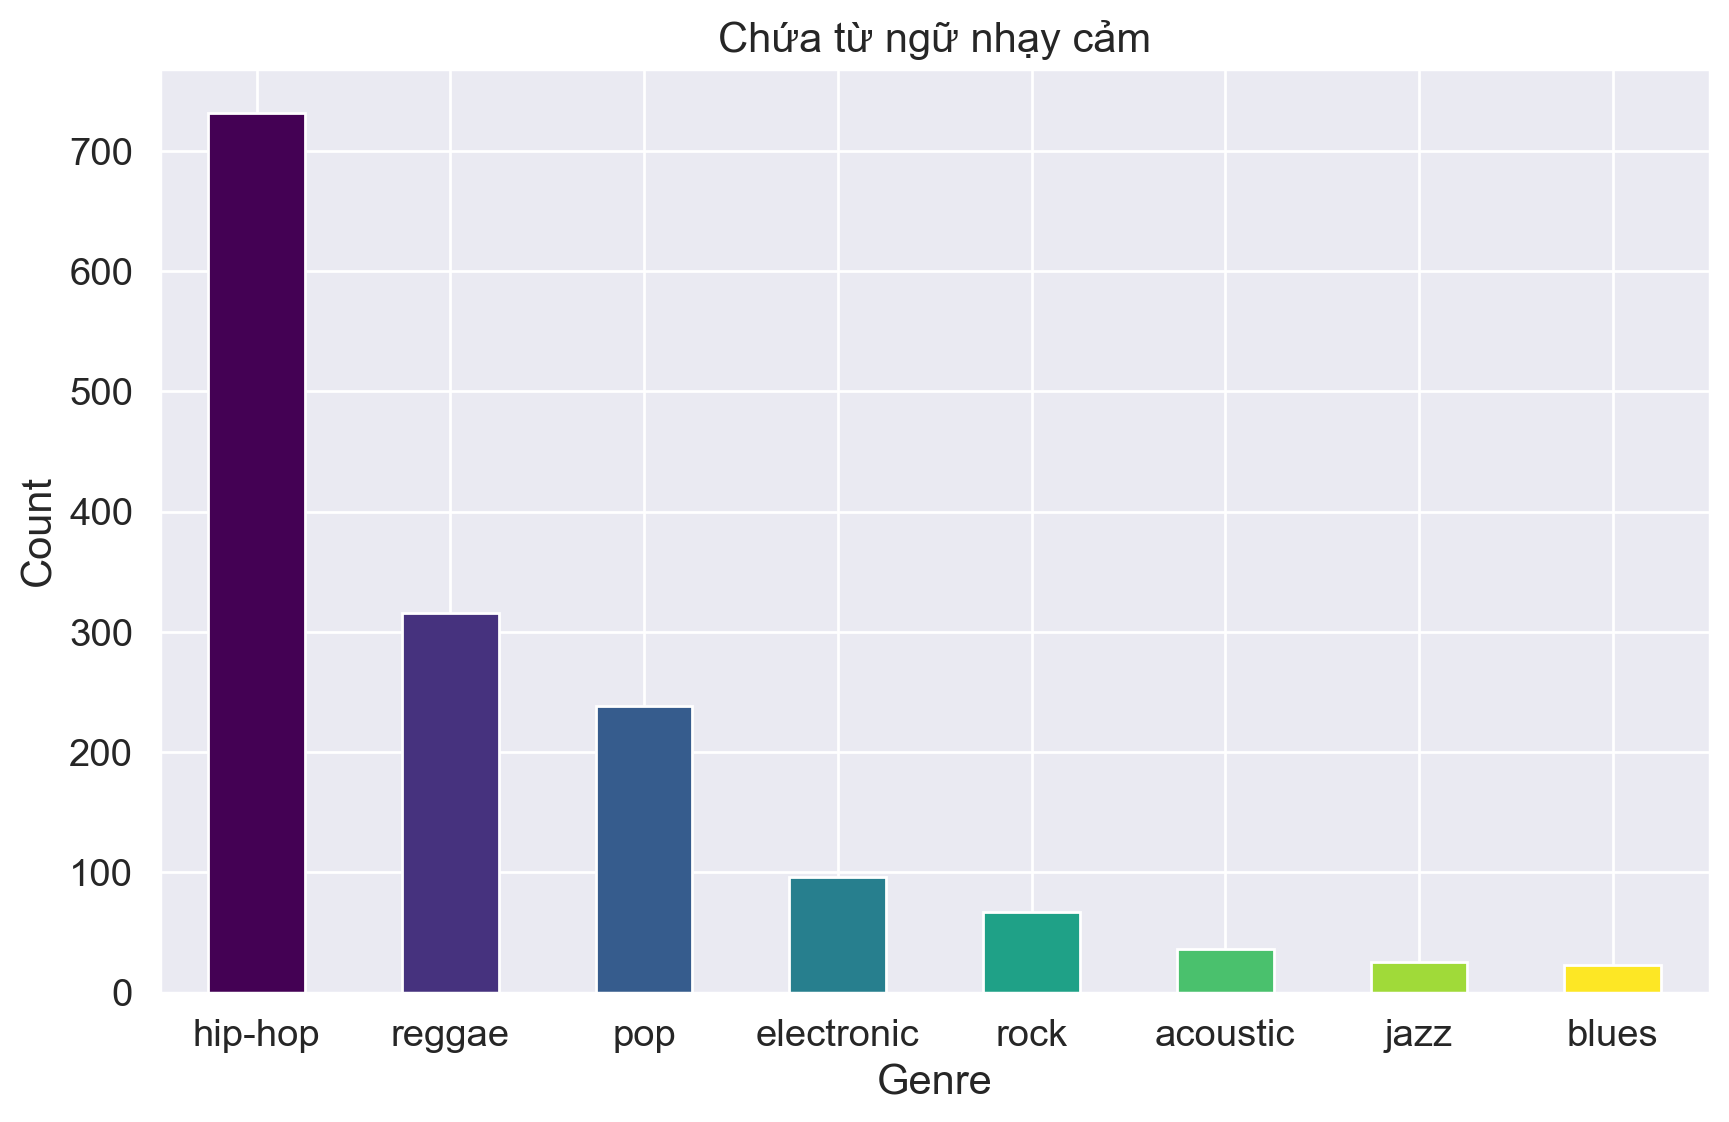

In [30]:
explicit_by_genre = train_data[train_data['explicit'] == 1].groupby('genre')["explicit"].count().sort_values(ascending=False)
explicit_by_genre.plot(kind='bar', figsize=(10, 6), color=plt.cm.viridis(np.linspace(0, 1, len(explicit_by_genre))))
plt.title('Chứa từ ngữ nhạy cảm')
plt.xticks(rotation=0)
plt.xlabel('Genre')

plt.ylabel('Count')

---
# Phân bố các trường audio features

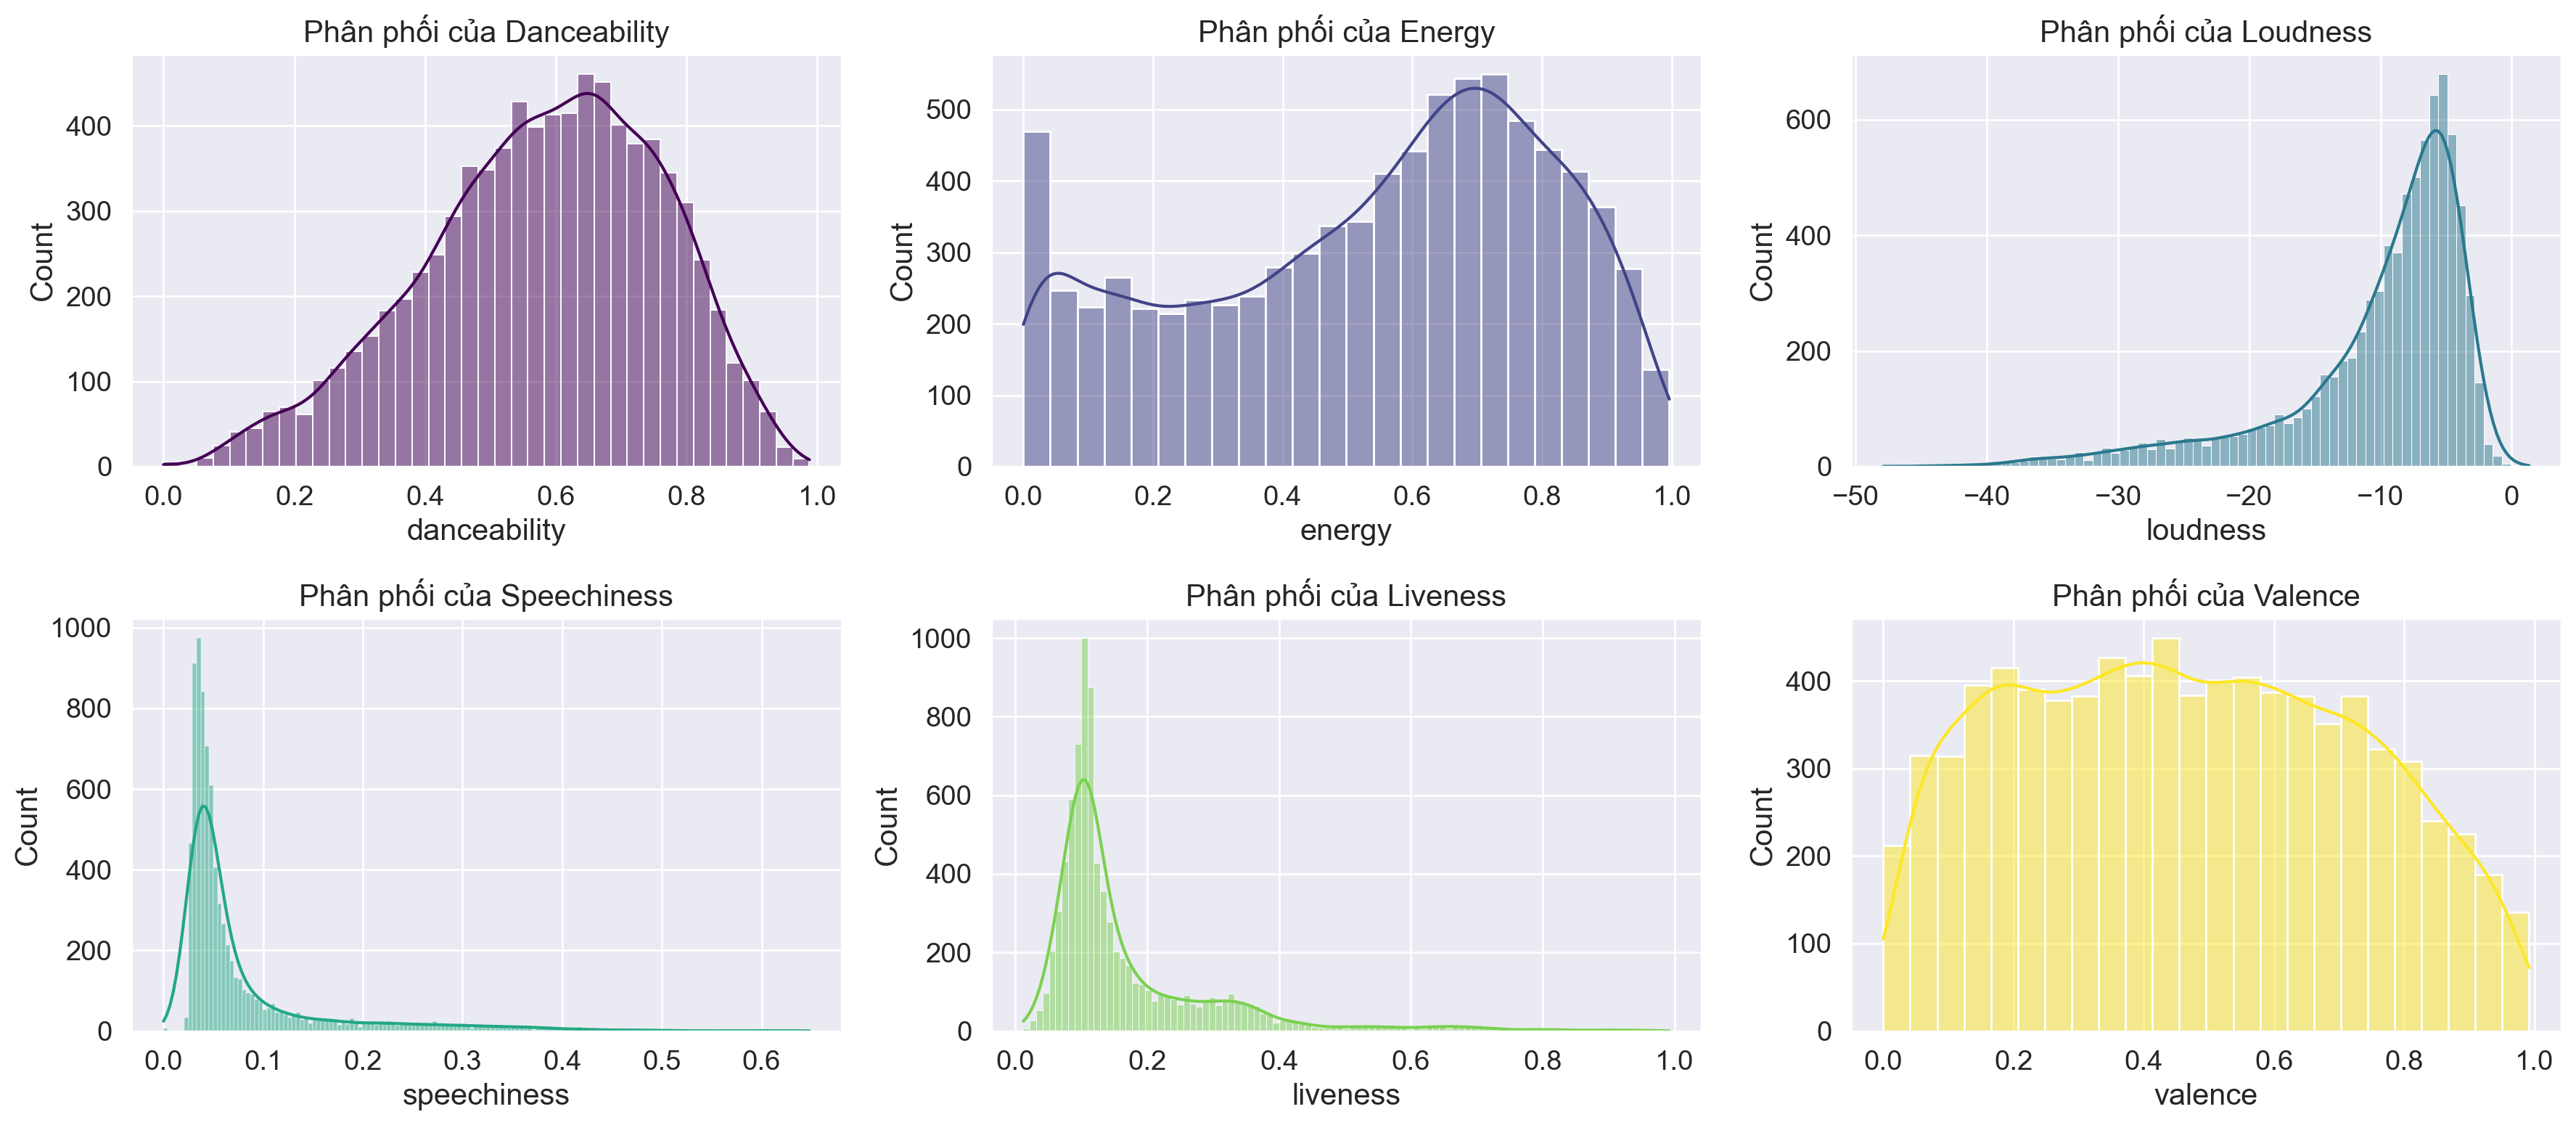

In [31]:
features = ['danceability', 'energy', 'loudness', 
            'speechiness', 'liveness', 'valence']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=train_data, x=feature, kde=True, ax=axes[i], color=plt.cm.viridis(np.linspace(0, 1, len(features)))[i])
    axes[i].set_title(f'Phân phối của {feature.capitalize()}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
# Ma trận tương quan của các thuộc tính audio features

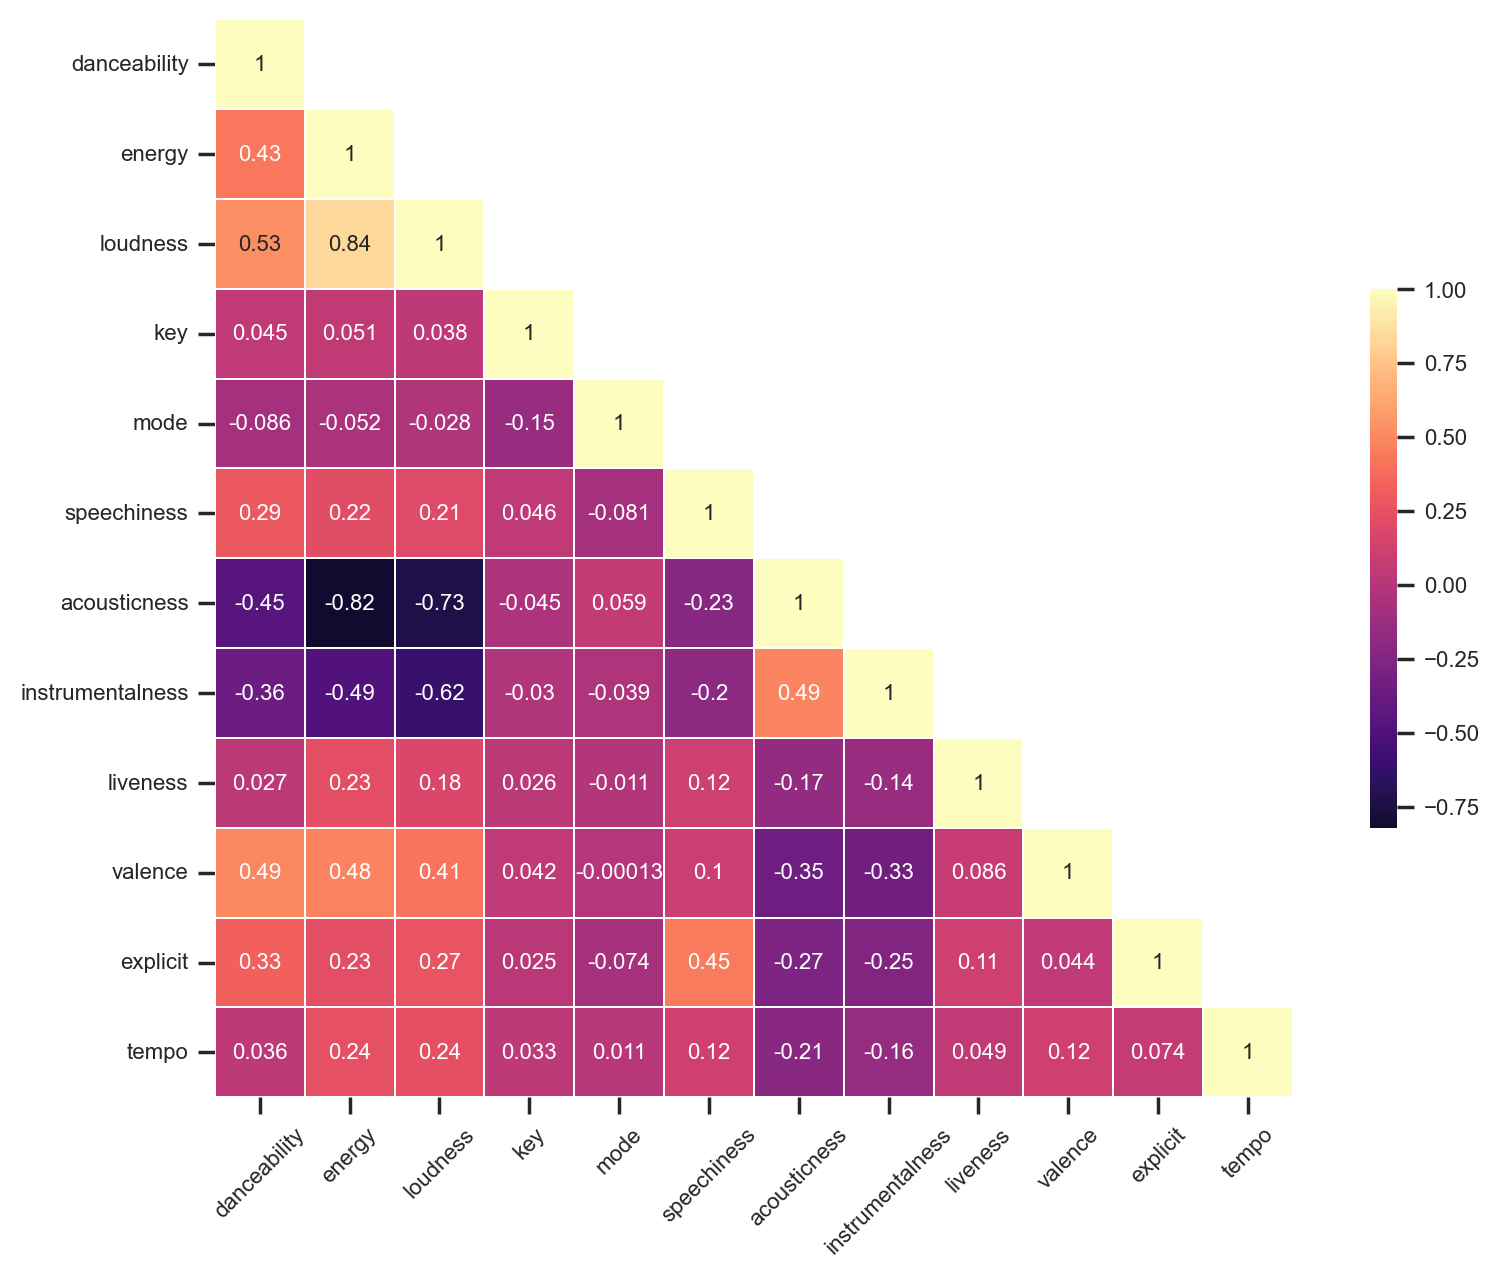

In [32]:
audio_features = ['danceability','energy', 'loudness','key',
                  'mode','speechiness','acousticness',
                  'instrumentalness','liveness','valence','explicit',
                  'tempo']
sns.set_theme(style="ticks")

corr = train_data[audio_features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
for i in range(len(mask)):
    mask[i, i] = False

f, ax = plt.subplots(figsize=(10, 7), dpi=200)

heatmap = sns.heatmap(corr, mask=mask, cmap=plt.cm.magma, vmax=1, center=0,
            square=True, linewidths=0.1, annot=True, annot_kws={"size":8},cbar_kws={"shrink": .5})

ax.tick_params(axis='x', labelsize=8, rotation=45)
ax.tick_params(axis='y', labelsize=8)

heatmap.figure.axes[-1].yaxis.label.set_size(10)
heatmap.figure.axes[-1].tick_params(labelsize=8)

---
# Energy And Danceability

In [ ]:
# Prepare plot settings
# Prepare the figure
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['figure.dpi'] = 200

color_dict = {
    'pop': '#FF6347',        # Tomato
    'rock': '#8A2BE2',       # BlueViolet
    'hip-hop': '#FFD700',    # Gold
    'reggae': '#32CD32',     # LimeGreen
    'acoustic': '#4682B4',   # SteelBlue
    'electronic': '#00CED1', # DarkTurquoise
    'blues': '#1E90FF',      # DodgerBlue
    'jazz': '#FF69B4',       # HotPink
    'classical': '#708090'   # SlateGray
}


# Function to update plot for each frame in the animation
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 200

# Function to update plot for each frame in the animation
def update(selected_genre):
    ax.clear()

    # Plot all genres with reduced alpha
    for genre in train_data["genre"].unique():
        genre_data = train_data[train_data['genre'] == genre]
        sns.scatterplot(
            x='energy', y='danceability', data=genre_data, color=color_dict[genre], 
            s=20, alpha=0.1 if genre != selected_genre else 1, ax=ax, label=genre
        )
    
    # Title update for each frame
    ax.set_title(f"Highlighting Genre: {selected_genre}")
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Get unique genres to loop through
unique_genres = train_data['genre'].unique()

# Create the animation
anim = FuncAnimation(fig, update, frames=unique_genres, repeat=True)

# Save the animation as a GIF without using `with` context
gif_path = "../result/energy-vs-danceability.gif"
writer = PillowWriter(fps=1)
anim.save(gif_path, writer=writer, dpi=200)

---
# Energy and Loudness

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['figure.dpi'] = 200

color_dict = {
    'pop': '#FF6347',        # Tomato
    'rock': '#8A2BE2',       # BlueViolet
    'hip-hop': '#FFD700',    # Gold
    'reggae': '#32CD32',     # LimeGreen
    'acoustic': '#4682B4',   # SteelBlue
    'electronic': '#00CED1', # DarkTurquoise
    'blues': '#1E90FF',      # DodgerBlue
    'jazz': '#FF69B4',       # HotPink
    'classical': '#708090'   # SlateGray
}


# Function to update plot for each frame in the animation
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 200

# Function to update plot for each frame in the animation
def update(selected_genre):
    ax.clear()

    # Plot all genres with reduced alpha
    for genre in train_data["genre"].unique():
        genre_data = train_data[train_data['genre'] == genre]
        sns.scatterplot(
            x='loudness', y='energy', data=genre_data, color=color_dict[genre], 
            s=20, alpha=0.1 if genre != selected_genre else 1, ax=ax, label=genre
        )
    
    # Title update for each frame
    ax.set_title(f"Highlighting Genre: {selected_genre}")
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Get unique genres to loop through
unique_genres = train_data['genre'].unique()

# Create the animation
anim = FuncAnimation(fig, update, frames=unique_genres, repeat=True)

# Save the animation as a GIF without using `with` context
gif_path = "../result/loudness-vs-energy.gif"
writer = PillowWriter(fps=1)
anim.save(gif_path, writer=writer, dpi=200)

---
# Acousticness and Instrumentalness

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['figure.dpi'] = 200

color_dict = {
    'pop': '#FF6347',        # Tomato
    'rock': '#8A2BE2',       # BlueViolet
    'hip-hop': '#FFD700',    # Gold
    'reggae': '#32CD32',     # LimeGreen
    'acoustic': '#4682B4',   # SteelBlue
    'electronic': '#00CED1', # DarkTurquoise
    'blues': '#1E90FF',      # DodgerBlue
    'jazz': '#FF69B4',       # HotPink
    'classical': '#708090'   # SlateGray
}


# Function to update plot for each frame in the animation
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 200

# Function to update plot for each frame in the animation
def update(selected_genre):
    ax.clear()

    # Plot all genres with reduced alpha
    for genre in train_data["genre"].unique():
        genre_data = train_data[train_data['genre'] == genre]
        sns.scatterplot(
            x='acousticness', y='instrumentalness', data=genre_data, color=color_dict[genre], 
            s=20, alpha=0.1 if genre != selected_genre else 1, ax=ax, label=genre
        )
    
    # Title update for each frame
    ax.set_title(f"Highlighting Genre: {selected_genre}")
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Get unique genres to loop through
unique_genres = train_data['genre'].unique()

# Create the animation
anim = FuncAnimation(fig, update, frames=unique_genres, repeat=True)

# Save the animation as a GIF without using `with` context
gif_path = "../result/acousticness-vs-instrumentalness.gif"
writer = PillowWriter(fps=1)
anim.save(gif_path, writer=writer, dpi=200)

---
# Acousticness and Energy

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.rcParams['figure.dpi'] = 200

color_dict = {
    'pop': '#FF6347',        # Tomato
    'rock': '#8A2BE2',       # BlueViolet
    'hip-hop': '#FFD700',    # Gold
    'reggae': '#32CD32',     # LimeGreen
    'acoustic': '#4682B4',   # SteelBlue
    'electronic': '#00CED1', # DarkTurquoise
    'blues': '#1E90FF',      # DodgerBlue
    'jazz': '#FF69B4',       # HotPink
    'classical': '#708090'   # SlateGray
}


# Function to update plot for each frame in the animation
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 200

# Function to update plot for each frame in the animation
def update(selected_genre):
    ax.clear()

    # Plot all genres with reduced alpha
    for genre in train_data["genre"].unique():
        genre_data = train_data[train_data['genre'] == genre]
        sns.scatterplot(
            x='acousticness', y='energy', data=genre_data, color=color_dict[genre], 
            s=20, alpha=0.075 if genre != selected_genre else 1, ax=ax, label=genre
        )
    
    # Title update for each frame
    ax.set_title(f"Highlighting Genre: {selected_genre}")
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Get unique genres to loop through
unique_genres = train_data['genre'].unique()

# Create the animation
anim = FuncAnimation(fig, update, frames=unique_genres, repeat=True)

# Save the animation as a GIF without using `with` context
gif_path = "../result/acousticness-vs-energy.gif"
writer = PillowWriter(fps=1)
anim.save(gif_path, writer=writer, dpi=200)